# `Comprehensive Data Analysis & Visualization of Apple Product Sales - 2024`

`This project aims to analyze and visualize sales data for Apple products, including iPhone, iPad, Mac, and Wearables. The goal is to uncover trends and patterns that can provide actionable insights into total sales by category, regional distribution, and product-wise data distribution.`

# 1. Dataset Loading and Initial Check

First We load the dataset and perform an initial check for column names and missing values. It's important to ensure that the dataset is correctly loaded and that there are no missing values before proceeding with analysis.

In [1]:
import pandas as pd

# Load the dataset
apple_sales_df = pd.read_csv("apple_sales_2024.csv")

# Verify column names and check for missing values
print("Columns in dataset:", apple_sales_df.columns)
print("Missing values:", apple_sales_df.isnull().sum())

Columns in dataset: Index(['State', 'Region', 'iPhone Sales (in million units)',
       'iPad Sales (in million units)', 'Mac Sales (in million units)',
       'Wearables Sales (in million units)',
       'Services Revenue (in billion $)'],
      dtype='object')
Missing values: State                                 0
Region                                0
iPhone Sales (in million units)       0
iPad Sales (in million units)         0
Mac Sales (in million units)          0
Wearables Sales (in million units)    0
Services Revenue (in billion $)       0
dtype: int64


# 2. Handle Missing Data

Missing values (if any) are handled. Here, we are filling missing values with zero, but depending on the dataset, we can choose to fill with the mean or median instead.

In [2]:
# Fill missing values with 0 (for simplicity)
apple_sales_df.fillna(0, inplace=True)

# 3. Data Visualization: Total Sales by Category

Visualizes the total sales for each product category (iPhone, iPad, Mac, & Wearables) using a bar chart.

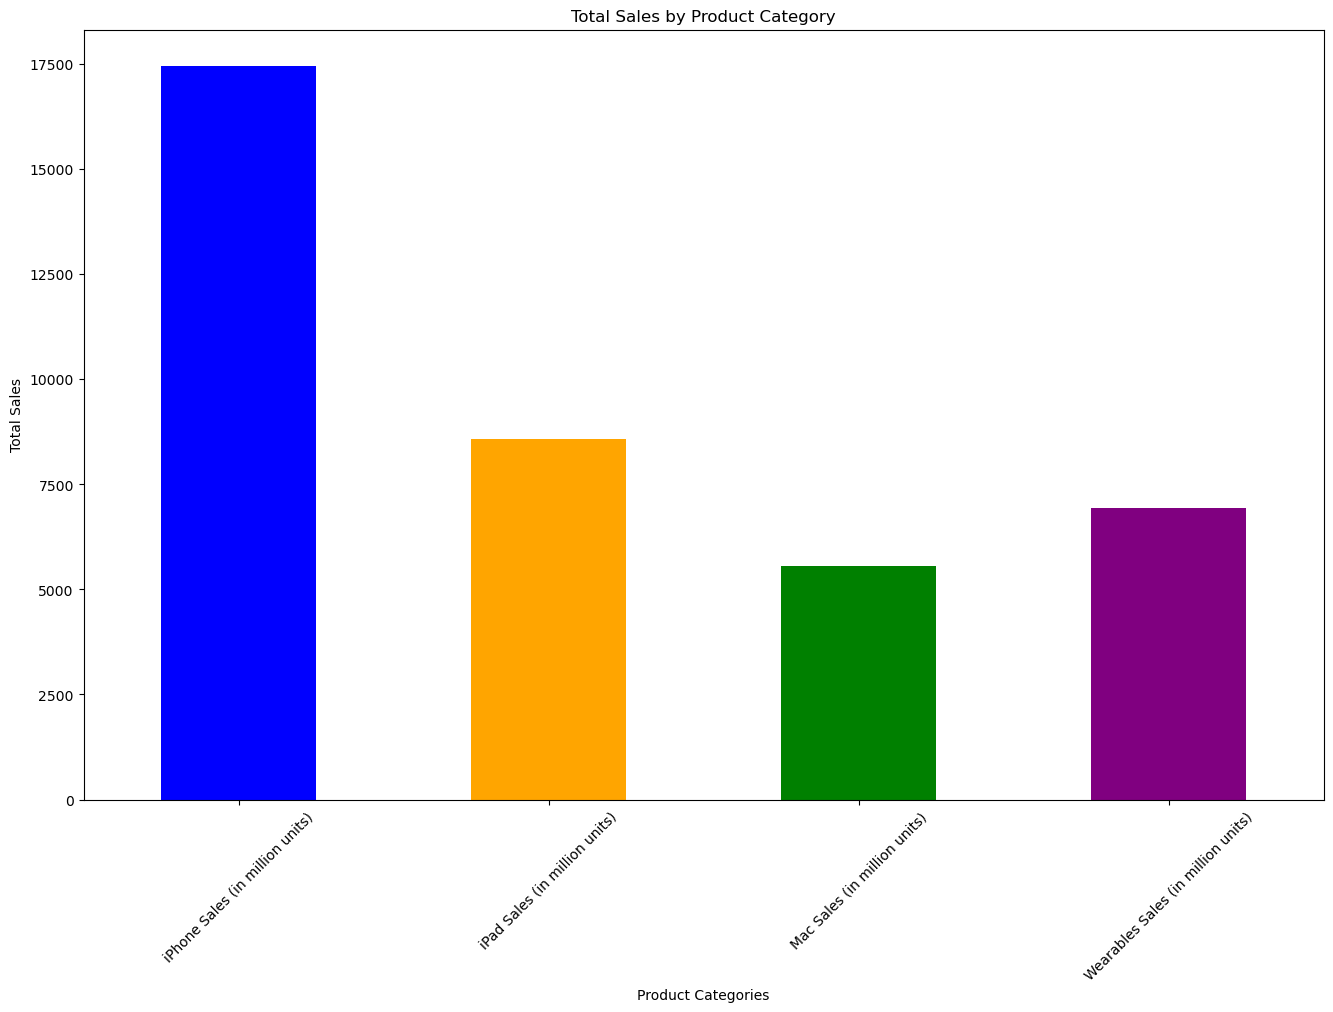

In [3]:
import matplotlib.pyplot as plt

# Calculate total sales by category
category_sales = apple_sales_df[['iPhone Sales (in million units)', 'iPad Sales (in million units)', 
                                 'Mac Sales (in million units)', 'Wearables Sales (in million units)']]

# Create a bar plot for total sales by category
plt.figure(figsize=(16, 10))
category_sales.sum().plot(kind='bar', color=['blue', 'orange', 'green', 'purple', 'red'])
plt.title("Total Sales by Product Category")
plt.xlabel("Product Categories")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# 4. Data Visualization: Sales by Region

We aggregate the sales by region and create a heatmap to visualize the regional distribution of sales across different product categories.

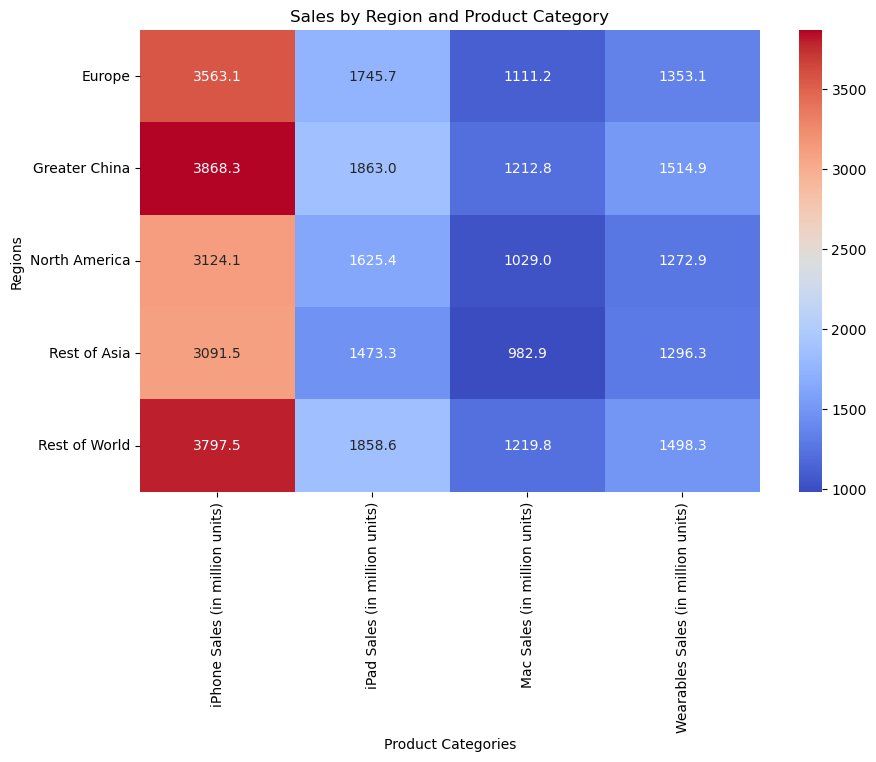

In [4]:
import seaborn as sns

# Aggregate sales by region
region_sales = apple_sales_df.groupby('Region')[['iPhone Sales (in million units)', 
                                                'iPad Sales (in million units)', 
                                                'Mac Sales (in million units)', 
                                                'Wearables Sales (in million units)']].sum()

# Heatmap for sales by region
plt.figure(figsize=(10, 6))
sns.heatmap(region_sales, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Sales by Region and Product Category")
plt.xlabel("Product Categories")
plt.ylabel("Regions")
plt.show()

# 5. Data Distribution: Sales Categories

Here We explore the distribution of sales for each product category using histograms. A kernel density estimate (KDE) is overlaid to better understand the distribution.

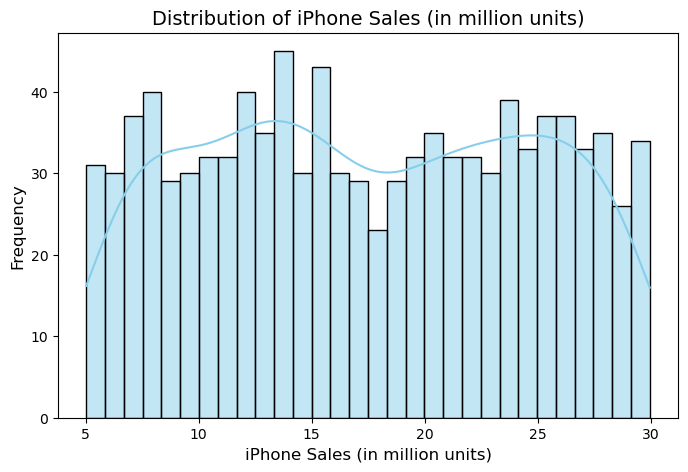

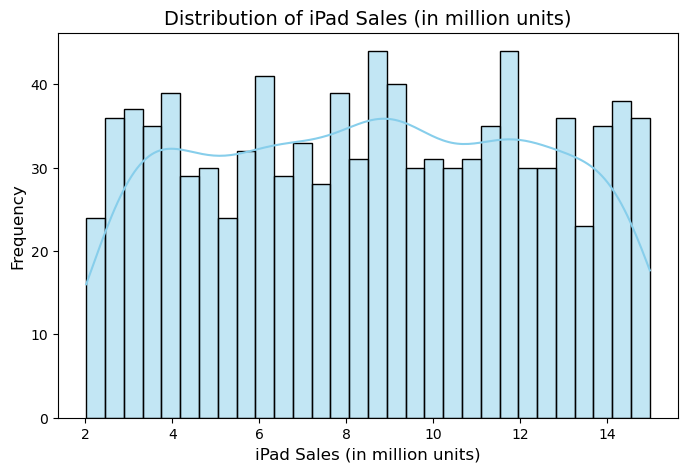

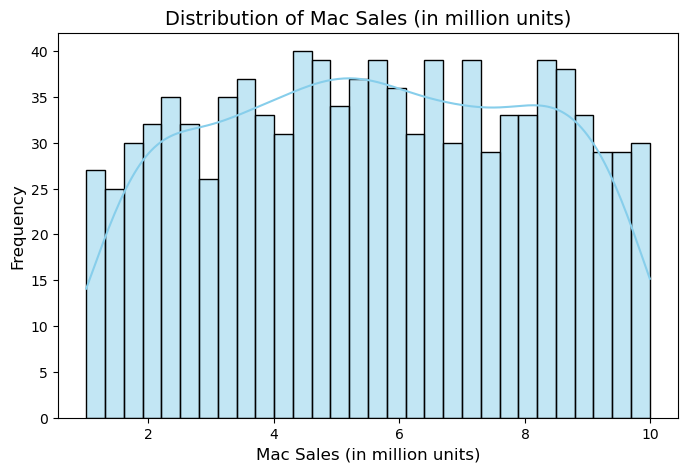

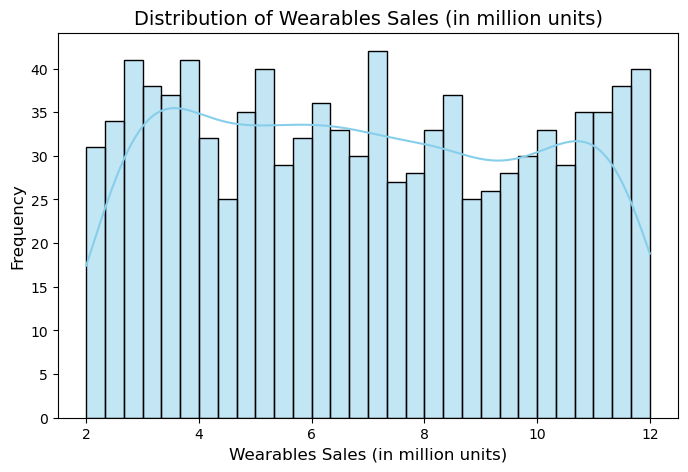

In [5]:
# List of sales columns
sales_columns = ['iPhone Sales (in million units)', 'iPad Sales (in million units)', 
                 'Mac Sales (in million units)', 'Wearables Sales (in million units)']

# Plot distribution for each sales category
for col in sales_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(apple_sales_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

# 6. Sales Aggregation by Region

We calculate the average sales for each product across different regions and plot it in a bar chart to understand regional differences in product demand.

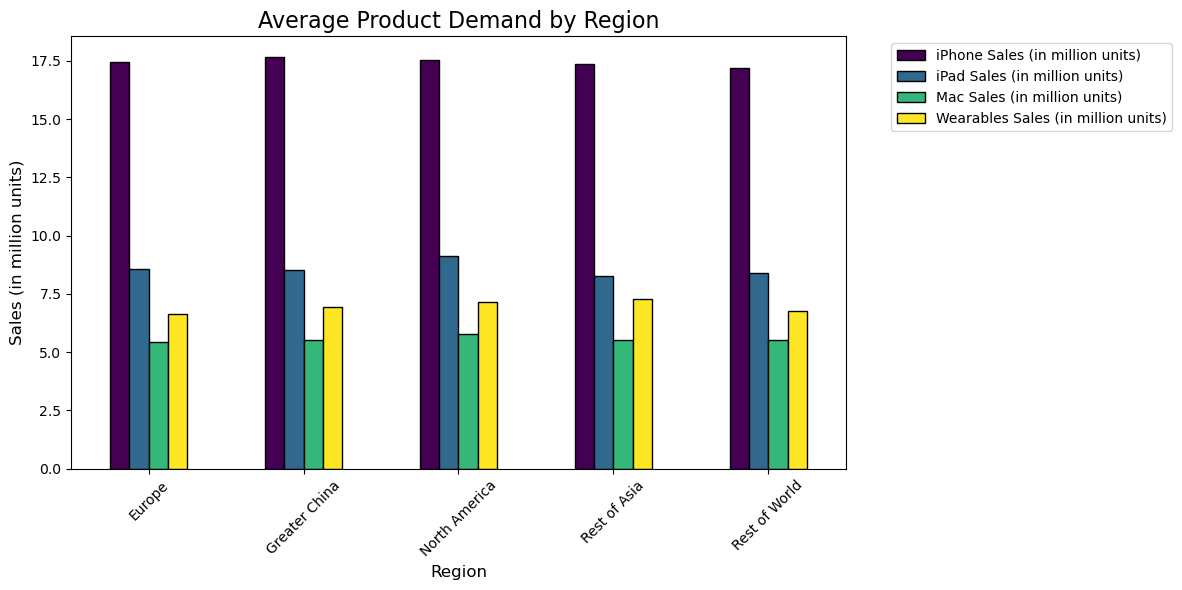

In [6]:
# Aggregate sales data by Region
region_agg = apple_sales_df.groupby('Region')[sales_columns].mean().reset_index()

# Plotting regional differences
region_agg.set_index('Region').plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title("Average Product Demand by Region", fontsize=16)
plt.ylabel("Sales (in million units)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 7. Visualizing different product sales across different States

### Total iPhone sales in different states 

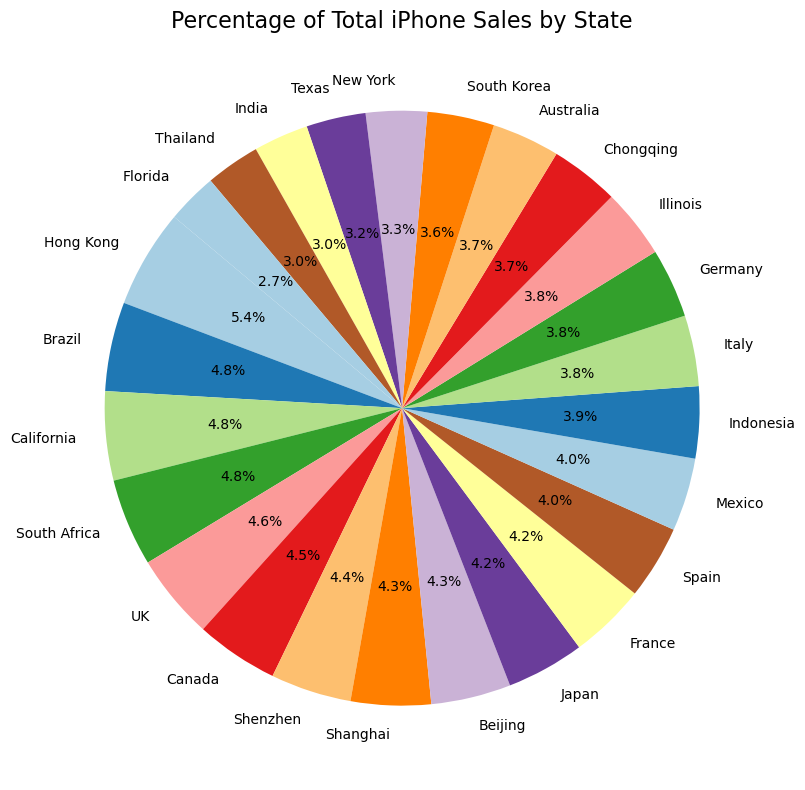

In [7]:
statewise_iphone_sales = apple_sales_df.groupby('State')['iPhone Sales (in million units)'].sum().reset_index()

statewise_iphone_sales = statewise_iphone_sales.sort_values(by='iPhone Sales (in million units)', ascending=False)

states = statewise_iphone_sales['State']
sales = statewise_iphone_sales['iPhone Sales (in million units)']

plt.figure(figsize=(10, 8))
plt.pie(sales, labels=states, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Percentage of Total iPhone Sales by State", fontsize=16)

plt.tight_layout()
plt.show()

### Total iPad sales in different states 

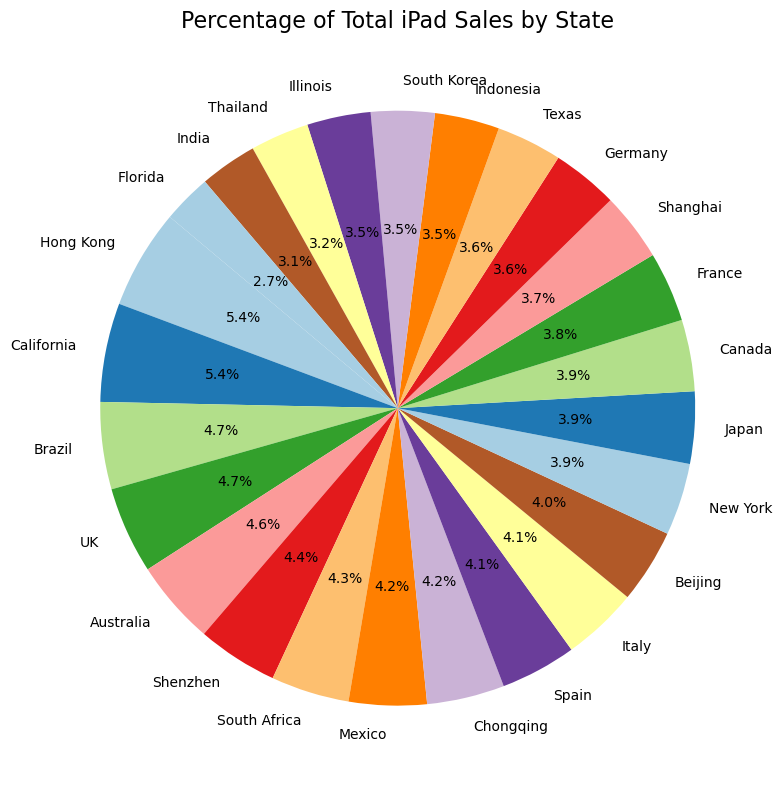

In [8]:
statewise_ipad_sales = apple_sales_df.groupby('State')['iPad Sales (in million units)'].sum().reset_index()

statewise_ipad_sales = statewise_ipad_sales.sort_values(by='iPad Sales (in million units)', ascending=False)

states = statewise_ipad_sales['State']
sales = statewise_ipad_sales['iPad Sales (in million units)']

plt.figure(figsize=(10, 8))
plt.pie(sales, labels=states, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Percentage of Total iPad Sales by State", fontsize=16)

plt.tight_layout()
plt.show()

### Total Mac sales in different states 

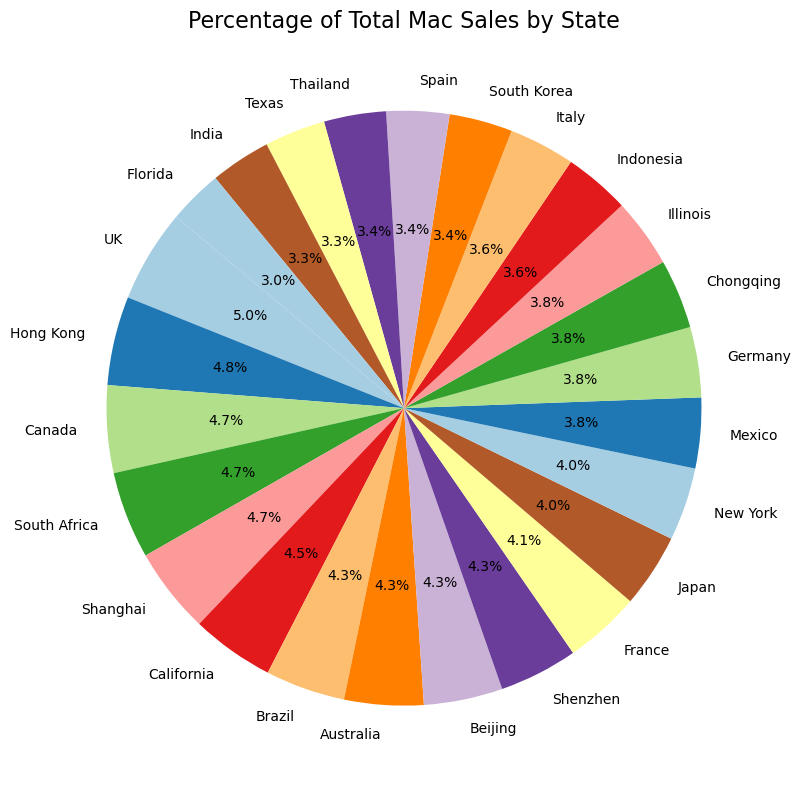

In [9]:
statewise_mac_sales = apple_sales_df.groupby('State')['Mac Sales (in million units)'].sum().reset_index()

statewise_mac_sales = statewise_mac_sales.sort_values(by='Mac Sales (in million units)', ascending=False)

states = statewise_mac_sales['State']
sales = statewise_mac_sales['Mac Sales (in million units)']

plt.figure(figsize=(10, 8))
plt.pie(sales, labels=states, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Percentage of Total Mac Sales by State", fontsize=16)

plt.tight_layout()
plt.show()

### Total Wearables sales in different states 

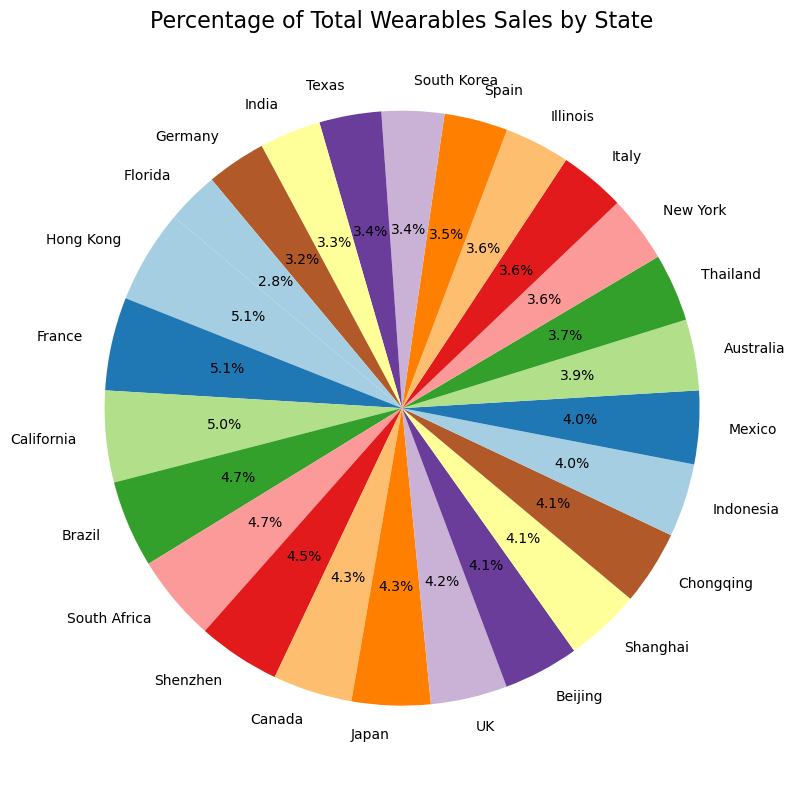

In [10]:
statewise_Wearables_sales = apple_sales_df.groupby('State')['Wearables Sales (in million units)'].sum().reset_index()

statewise_Wearables_sales = statewise_Wearables_sales.sort_values(by='Wearables Sales (in million units)', ascending=False)

states = statewise_Wearables_sales['State']
sales = statewise_Wearables_sales['Wearables Sales (in million units)']

plt.figure(figsize=(10, 8))
plt.pie(sales, labels=states, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Percentage of Total Wearables Sales by State", fontsize=16)

plt.tight_layout()
plt.show()

### Revenue in different states 

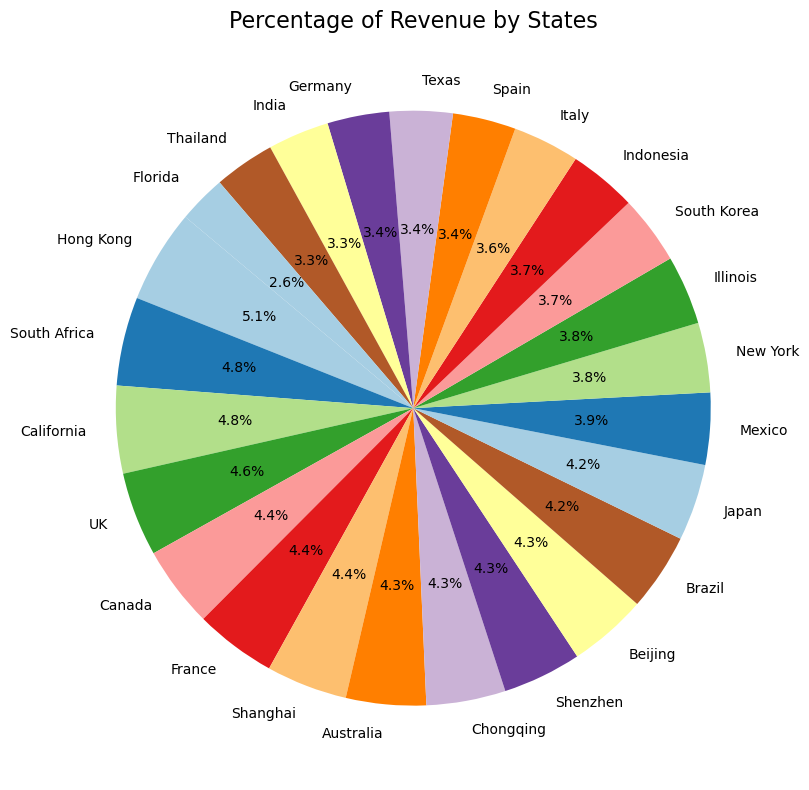

In [11]:
statewise_Revenue = apple_sales_df.groupby('State')['Services Revenue (in billion $)'].sum().reset_index()

statewise_Revenue = statewise_Revenue.sort_values(by='Services Revenue (in billion $)', ascending=False)

states = statewise_Revenue['State']
sales = statewise_Revenue['Services Revenue (in billion $)']

plt.figure(figsize=(10, 8))
plt.pie(sales, labels=states, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Percentage of Revenue by States", fontsize=16)

plt.tight_layout()
plt.show()

### Highest & Lowest Overall Performing States

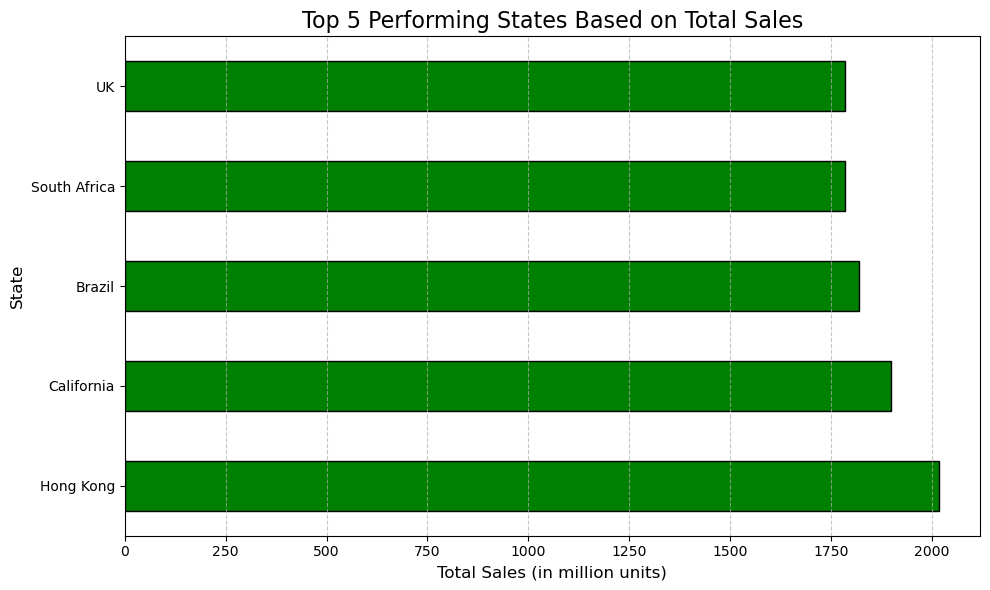

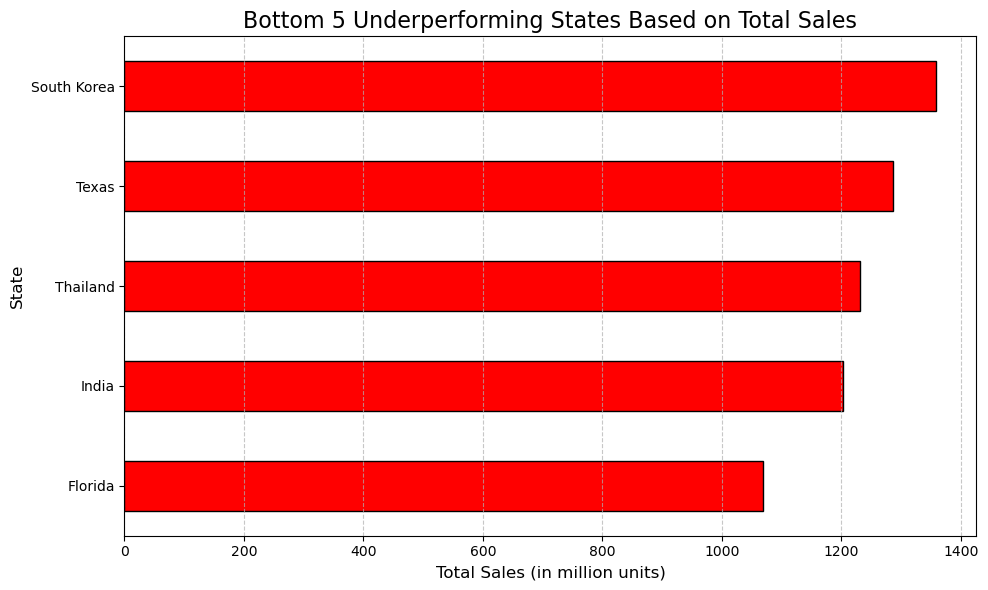

In [13]:
apple_sales_df['Total Sales (in million units)'] = (
    apple_sales_df['iPhone Sales (in million units)'] +
    apple_sales_df['iPad Sales (in million units)'] +
    apple_sales_df['Mac Sales (in million units)'] +
    apple_sales_df['Wearables Sales (in million units)']
)

# High-performing states based on total sales
top_countries = apple_sales_df.groupby('State')['Total Sales (in million units)'].sum().sort_values(ascending=False).head(5)

# Underperforming states
bottom_countries = apple_sales_df.groupby('State')['Total Sales (in million units)'].sum().sort_values(ascending=True).head(5)

# Plotting the top 5 performing states
plt.figure(figsize=(10, 6))
top_countries.plot(kind='barh', color='green', edgecolor='black')
plt.title("Top 5 Performing States Based on Total Sales", fontsize=16)
plt.xlabel("Total Sales (in million units)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the bottom 5 underperforming states
plt.figure(figsize=(10, 6))
bottom_countries.plot(kind='barh', color='red', edgecolor='black')
plt.title("Bottom 5 Underperforming States Based on Total Sales", fontsize=16)
plt.xlabel("Total Sales (in million units)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 8. Boxplots: Outlier Detection

We use boxplots to detect potential outliers in the sales data for each product category. Outliers are values that significantly deviate from the rest of the data.

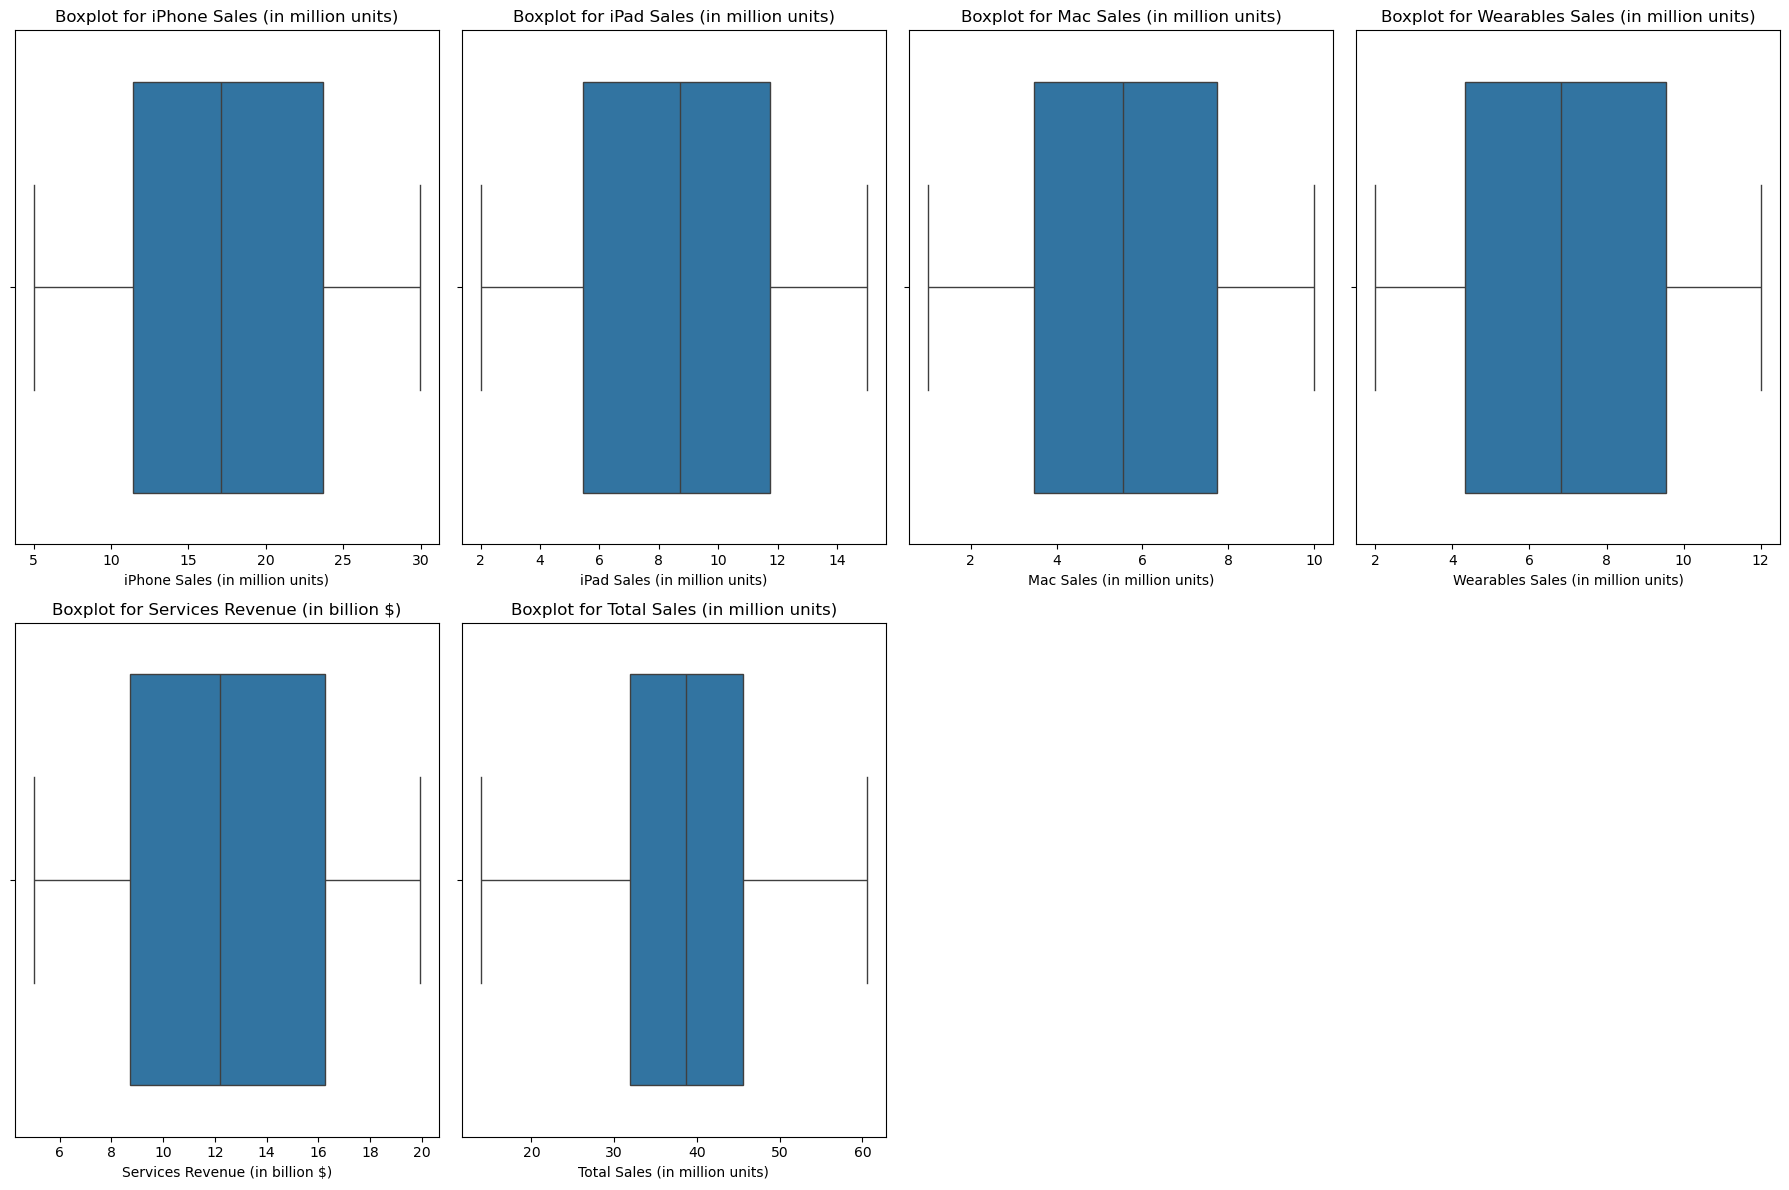

In [14]:
def remove_outliers(df):
    numeric_columns = apple_sales_df.select_dtypes(include=['float64', 'int64']).columns
    num_columns = len(numeric_columns)
    num_per_row = 4 
    num_rows = -(-num_columns // num_per_row)  

    fig, axes = plt.subplots(num_rows, num_per_row, figsize=(18, 6 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(numeric_columns):
        Q1 = apple_sales_df[column].quantile(0.25)
        Q3 = apple_sales_df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = apple_sales_df[(apple_sales_df[column] >= lower_bound) & (apple_sales_df[column] <= upper_bound)]
        
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot for {column}')
    
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return df

df = remove_outliers(apple_sales_df)

# 9. Label Encoding: Convert Categorical Features

We encode the categorical variables 'State' and 'Region' into numerical values using label encoding, which is useful for machine learning models.

In [15]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'State' and 'Region'
label_encoder_state = LabelEncoder()
label_encoder_region = LabelEncoder()

apple_sales_df['State_encoded'] = label_encoder_state.fit_transform(apple_sales_df['State'])
apple_sales_df['Region_encoded'] = label_encoder_region.fit_transform(apple_sales_df['Region'])

print("State Encoded: \n", apple_sales_df['State_encoded'])
print("Region Encoded: \n", apple_sales_df['Region_encoded'])

State Encoded: 
 0       5
1       8
2      24
3      17
4      23
       ..
995    15
996    22
997     8
998    18
999    17
Name: State_encoded, Length: 1000, dtype: int64
Region Encoded: 
 0      1
1      0
2      0
3      1
4      3
      ..
995    4
996    2
997    0
998    1
999    1
Name: Region_encoded, Length: 1000, dtype: int64


# 10. Data Normalization: Min-Max Scaling

We use MinMaxScaler to normalize the numerical features to a range of [0, 1]. This is useful for clustering and machine learning models that are sensitive to the scale of the data.

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features
scaler = MinMaxScaler()
apple_sales_df[sales_columns] = scaler.fit_transform(apple_sales_df[sales_columns])

# Check normalized data
apple_sales_df.head()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables Sales (in million units),Services Revenue (in billion $),Total Sales (in million units),State_encoded,Region_encoded
0,Chongqing,Greater China,0.097551,0.364688,0.020045,0.388,15.88,21.28,5,1
1,Germany,Europe,0.144520,0.928296,0.670379,0.542,10.12,37.14,8,0
2,UK,Europe,0.023284,0.930609,0.865256,0.619,19.85,36.67,24,0
3,Shanghai,Greater China,0.112003,0.458751,0.976615,0.028,6.16,27.85,17,1
4,Thailand,Rest of Asia,0.468487,0.471087,0.606904,0.148,13.29,34.77,23,3


# 11. Calculate Total Sales and Product Contribution

We calculate the total sales per record and the contribution of each product (iPhone, iPad, Mac, Wearables) to the total sales.

In [17]:
# Calculate total sales per record
apple_sales_df['Total Sales (in million units)'] = (
    apple_sales_df['iPhone Sales (in million units)'] +
    apple_sales_df['iPad Sales (in million units)'] +
    apple_sales_df['Mac Sales (in million units)'] +
    apple_sales_df['Wearables Sales (in million units)']
)

# Calculate percentage contribution of each product
apple_sales_df['iPhone Contribution (%)'] = (apple_sales_df['iPhone Sales (in million units)'] / apple_sales_df['Total Sales (in million units)']) * 100
apple_sales_df['iPad Contribution (%)'] = (apple_sales_df['iPad Sales (in million units)'] / apple_sales_df['Total Sales (in million units)']) * 100
apple_sales_df['Mac Contribution (%)'] = (apple_sales_df['Mac Sales (in million units)'] / apple_sales_df['Total Sales (in million units)']) * 100
apple_sales_df['Wearables Contribution (%)'] = (apple_sales_df['Wearables Sales (in million units)'] / apple_sales_df['Total Sales (in million units)']) * 100

print("Iphone Contribution: \n",apple_sales_df['iPhone Contribution (%)'])
print("Ipad Contribution: \n",apple_sales_df['iPad Contribution (%)'])
print("Mac Contribution: \n",apple_sales_df['Mac Contribution (%)'])
print("Wearables Contribution: \n",apple_sales_df['Wearables Contribution (%)'])

Iphone Contribution: 
 0      11.209128
1       6.324199
2       0.954979
3       7.109650
4      27.647841
         ...    
995    32.084439
996    32.134094
997    32.626696
998    17.099160
999    51.830963
Name: iPhone Contribution (%), Length: 1000, dtype: float64
Ipad Contribution: 
 0      41.904478
1      40.622183
2      38.168671
3      29.120225
4      27.801314
         ...    
995    20.548580
996    28.421976
997    17.382371
998    21.628163
999     9.547413
Name: iPad Contribution (%), Length: 1000, dtype: float64
Mac Contribution: 
 0       2.303220
1      29.335730
2      35.488238
3      61.992763
4      35.816592
         ...    
995    22.904245
996    30.807384
997    30.507655
998    33.262263
999    16.222972
Name: Mac Contribution (%), Length: 1000, dtype: float64
Wearables Contribution: 
 0      44.583175
1      23.717889
2      25.388112
3       1.777362
4       8.734254
         ...    
995    24.462737
996     8.636545
997    19.483278
998    28.010414
999 

# 12. Correlation Heatmap

A correlation heatmap is generated to understand the relationships between various product categories. This helps identify how closely related the sales of different products are.

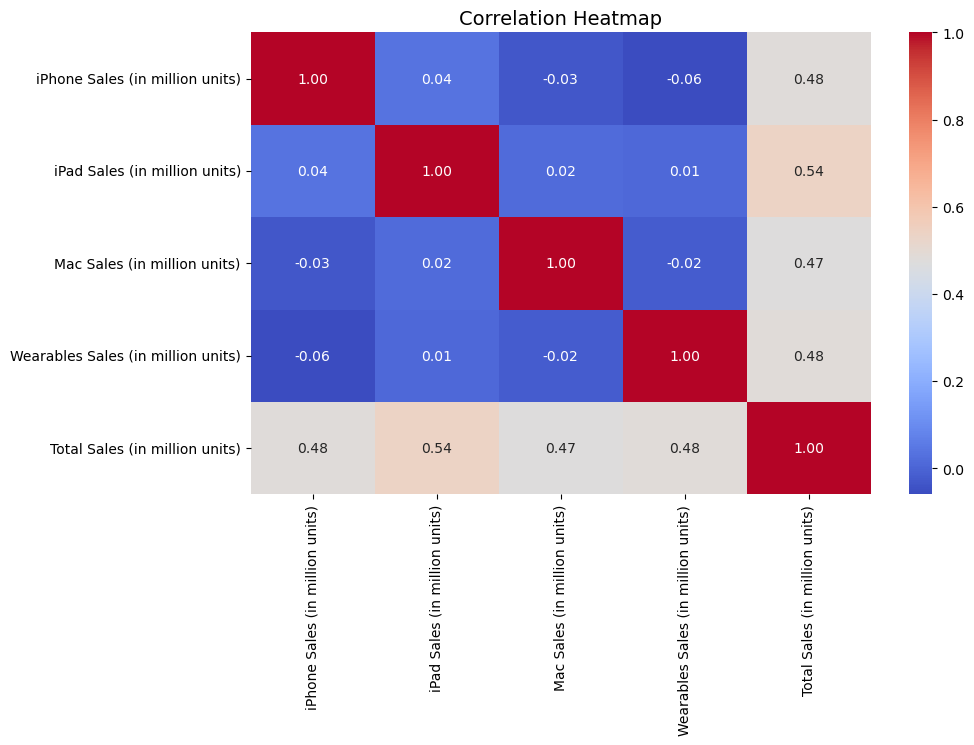

In [18]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(apple_sales_df[sales_columns + ['Total Sales (in million units)']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# 13. Clustering: KMeans Analysis

We perform clustering using KMeans to identify similar groups of records based on product sales. The optimal number of clusters is determined using the silhouette score.

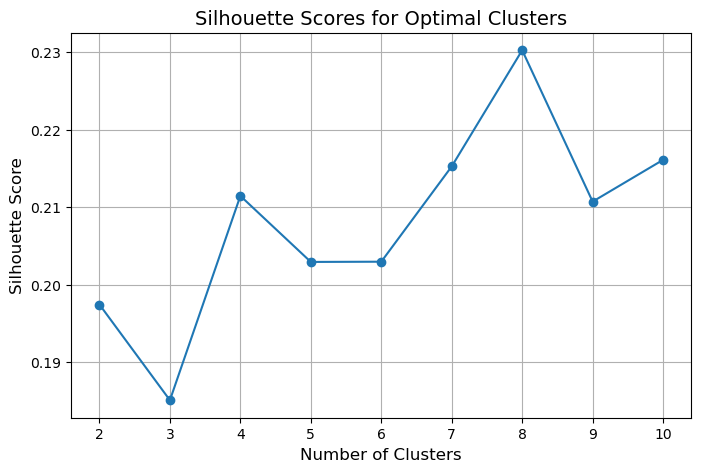

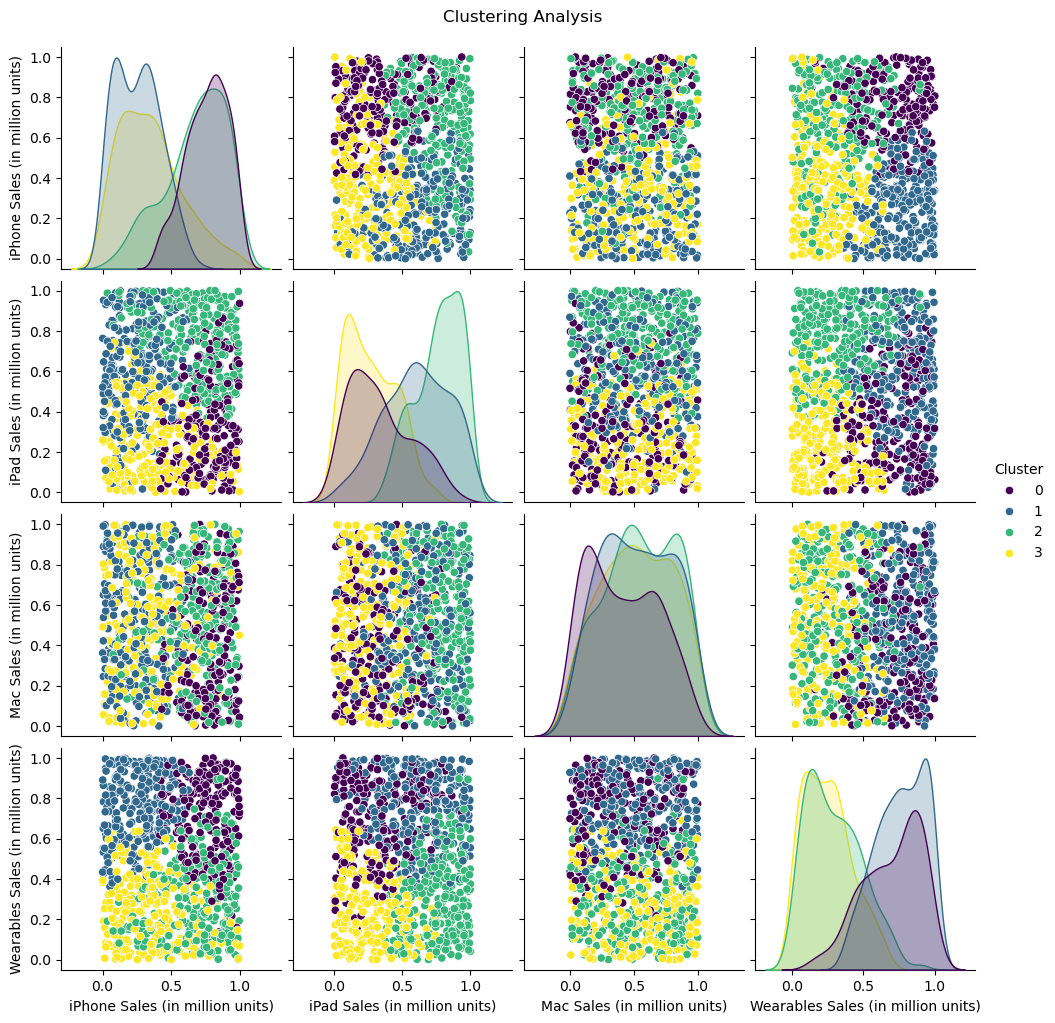

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select features for clustering
clustering_features = ['iPhone Sales (in million units)', 'iPad Sales (in million units)', 
                       'Mac Sales (in million units)', 'Wearables Sales (in million units)']

# Calculate silhouette scores to find the optimal number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(apple_sales_df[clustering_features])
    silhouette_scores.append(silhouette_score(apple_sales_df[clustering_features], kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Optimal Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.grid()
plt.show()

# Fit K-Means with optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=4, random_state=42)
apple_sales_df['Cluster'] = kmeans.fit_predict(apple_sales_df[clustering_features])

# Visualize clusters
sns.pairplot(apple_sales_df, vars=clustering_features, hue='Cluster', palette='viridis')
plt.suptitle("Clustering Analysis", y=1.02)
plt.show()

# 14. Predictive Modeling: Linear Regression, Random Forest, and Gradient Boosting

We build multiple machine learning models (Linear Regression, Random Forest, and Gradient Boosting) to predict Services Revenue. Model performance is evaluated using RMSE, MAE, and R².

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare data for modeling
X = apple_sales_df[sales_columns + ['State_encoded', 'Region_encoded']]
y = apple_sales_df['Services Revenue (in billion $)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to train
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train models and evaluate performance
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results[name] = {
        "RMSE": mean_squared_error(y_test, y_pred, squared=False),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred)
    }

# Display results
print("Model Performance Comparison:")
for model_name, metrics in model_results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.3f}")

/usr/lib/python3/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Performance Comparison:

Linear Regression:
  RMSE: 4.328
  MAE: 3.807
  R²: -0.001

Random Forest:
  RMSE: 4.528
  MAE: 3.930
  R²: -0.096

Gradient Boosting:
  RMSE: 4.532
  MAE: 3.908
  R²: -0.098


/usr/lib/python3/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# 15. Hyperparameter Tuning

Here We perform hyperparameter tuning for the Gradient Boosting model using GridSearchCV to optimize the model's parameters for better performance.

In [21]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Gradient Boosting
param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("\nBest Parameters for Gradient Boosting:", grid_search.best_params_)


Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


# 16. Feature Importance Using Random Forest

### Feature Importance Using Random Forest
Random Forest is used to assess the importance of different features in predicting total sales. This helps in understanding which variables have the most impact.

/tmp/ipykernel_12265/4200091649.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


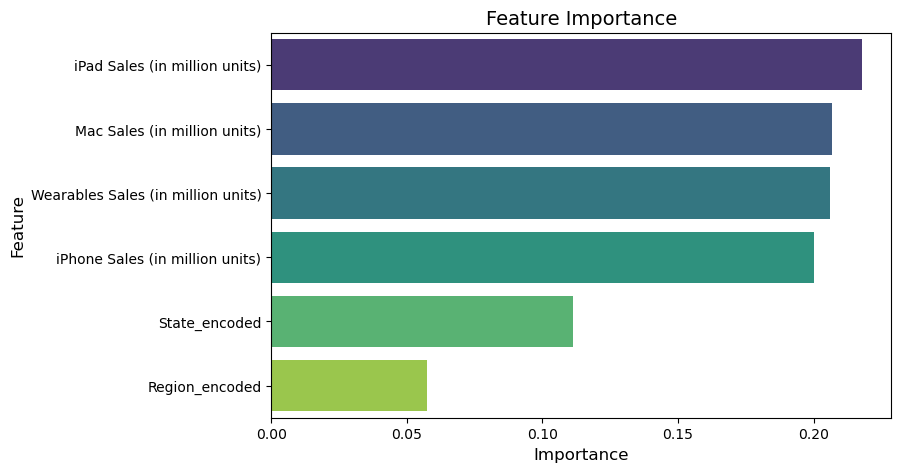

In [22]:
# Feature importance using Random Forest
random_forest_model = models["Random Forest"]
feature_importance = random_forest_model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

# Visualize feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

# Conclusion:
This project provided valuable insights into Apple product sales and strengthened my skills in data analysis and visualization. The findings can serve as a basis for strategic decision-making and further exploration of sales trends.

### Key Findings

Product Sales Trends: Identified which product categories had the highest and lowest sales.

Regional Distribution: Gained insights into regions contributing the most and least to sales.

Sales Patterns: Observed sales distributions across product lines and regions, highlighting areas for growth.